# PVE-analysis on research funding
*Collective Compass Project, DJA, July 2022*


---
## Loading the necessary Python modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import requests
plt.rcParams.update({'font.size': 14}) # must set in top
plt.rcParams.update({'figure.figsize': (14, 4)}) # must set in top

In [2]:
# download a fresh copy of the dataset from the OSF
data_url = 'https://osf.io/f76rb//?action=download'
response = requests.get(data_url)

if response.status_code == 200:
    with open('../data/dat.csv', 'wb') as f:
        f.write(response.content)

In [3]:
df = pd.read_csv('../data/dat.csv')

---
## Plot basic participation stats per stratification of choice

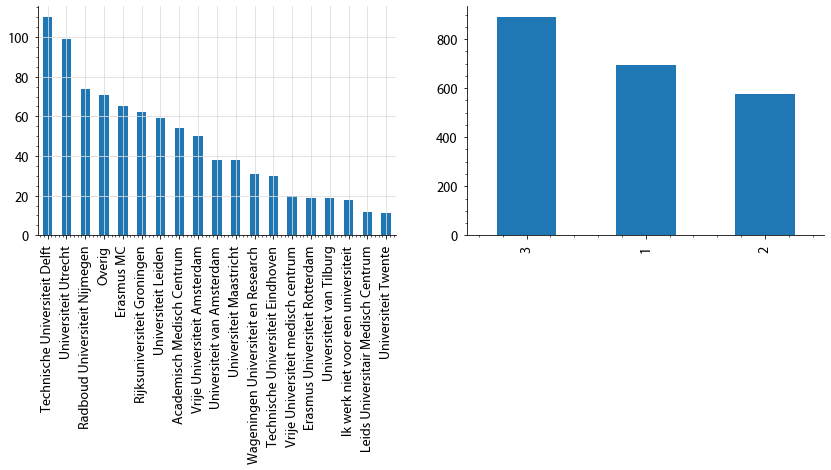

In [4]:
plt.figure()
plt.subplot(121)
df['institution'].value_counts().plot.bar()
plt.grid()
plt.subplot(122)
df['versie'].value_counts().plot.bar();

<AxesSubplot:>

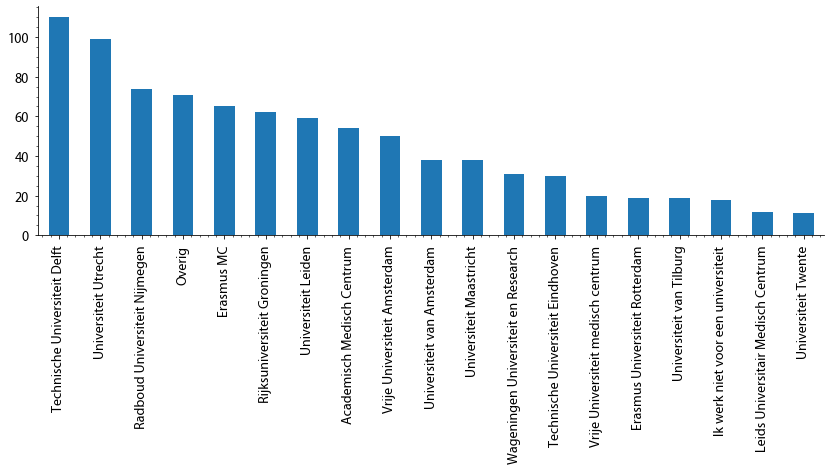

In [13]:
plt.figure()
df['institution'].value_counts().plot.bar()

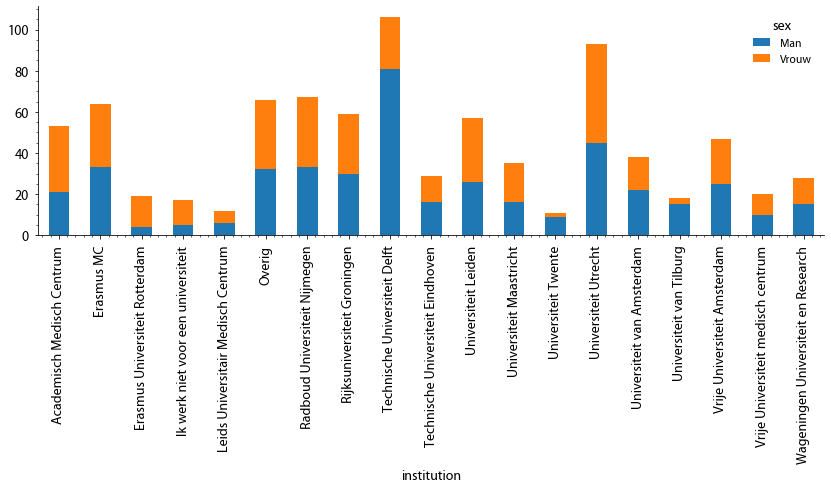

In [5]:
df_vals = df[['institution', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

<AxesSubplot:>

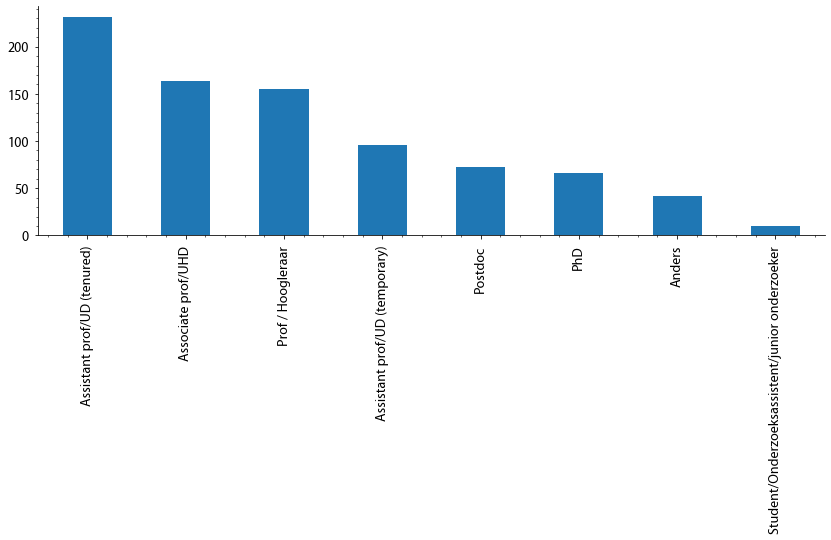

In [15]:
plt.figure()
df['pos9'].value_counts().plot.bar()

<AxesSubplot:>

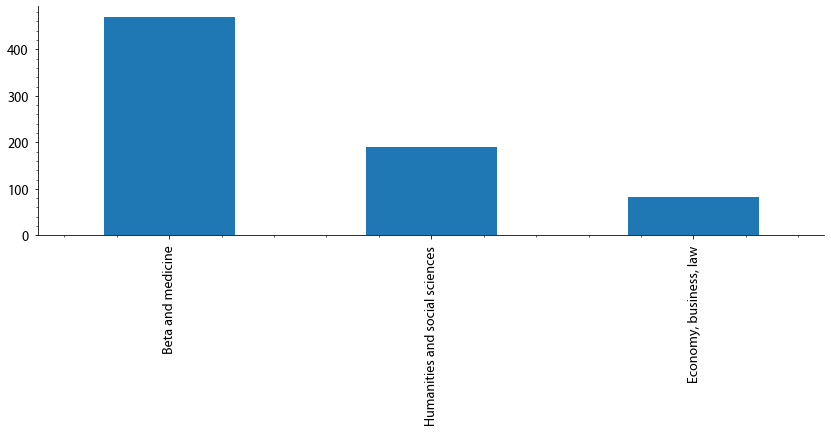

In [16]:
plt.figure()
df['discipline'].value_counts().plot.bar()

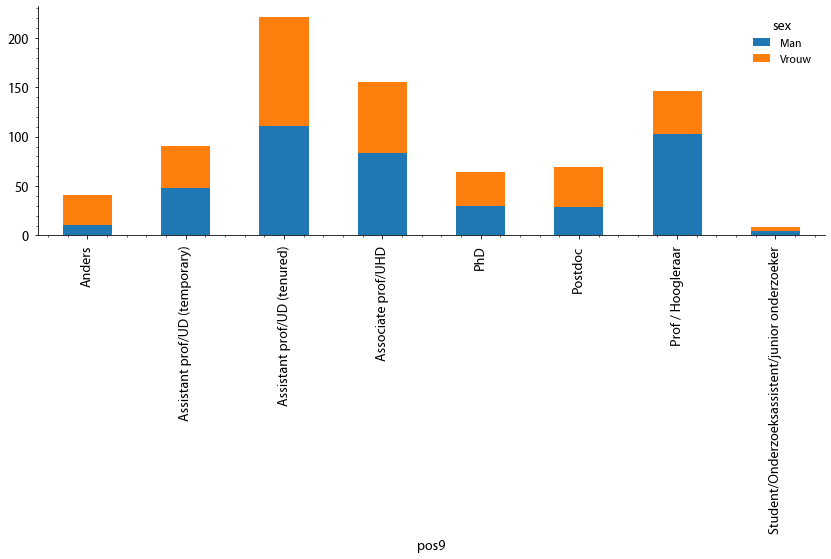

In [18]:
df_vals = df[['pos9', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

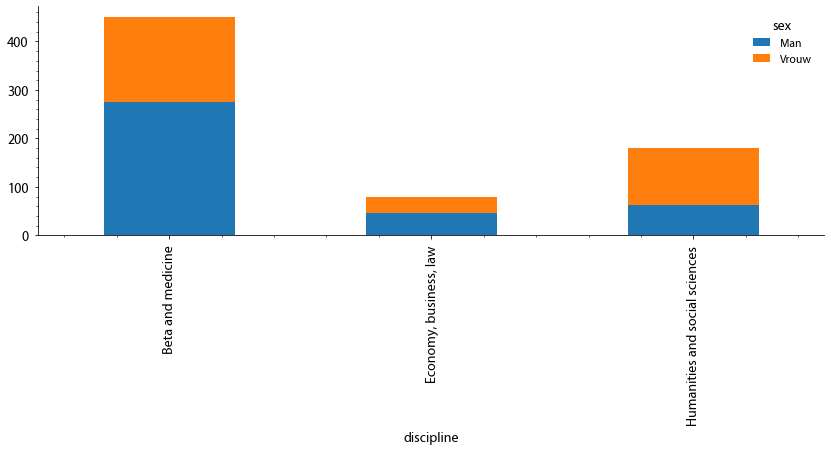

In [17]:
df_vals = df[['discipline', 'sex']].value_counts()
df_vals.unstack('sex').plot.bar(stacked=True);

---
## Postprocess the kt values to fraction of the total budget.

In [7]:
# Second, we multiply the kt values with the values above and normalize with the total
# to make each kt a fraction of the total money spend.
mask = df.columns.str.contains('funds_available|versie|kt_funds_*')
df_kt = df.iloc[:, mask].copy()
df_kt = df_kt.dropna()

for col in df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')]:
    df_kt.loc[:, col] /= df_kt.loc[:, 'funds_available']

In [8]:
# Create a table with the fraction spent per kt item per group.
kts = list( df_kt.iloc[:, df_kt.columns.str.contains('kt_funds*')] )
df_kt_per_version = df_kt.groupby('versie')[ kts ]
df_kt_per_version.mean()

,kt_funds_personal_senior,kt_funds_team,kt_funds_personal_ecr,kt_funds_thematic,kt_funds_thematic_co,kt_funds_small_first,kt_funds_small_second,kt_funds_award,kt_funds_first_ecr,kt_funds_rolling_ecr,kt_funds_rolling_senior
versie,,,,,,,,,,,
1,0.052622,0.062306,0.051907,0.085965,0.049113,0.057483,0.040687,0.007810,0.089590,0.267156,0.157234
2,0.057031,0.061634,0.062599,0.077049,0.049242,0.052684,0.035244,0.012338,0.129582,0.272924,0.152615
3,0.052332,0.061664,0.058326,0.094383,0.052118,0.058113,0.038889,0.007816,0.110471,0.276687,0.142906


In [9]:
# Print the fraction of the total money spent per experiment version.
df_kt_per_version.mean().sum(axis=1)

versie
1    0.921874
2    0.962940
3    0.953705
dtype: float64

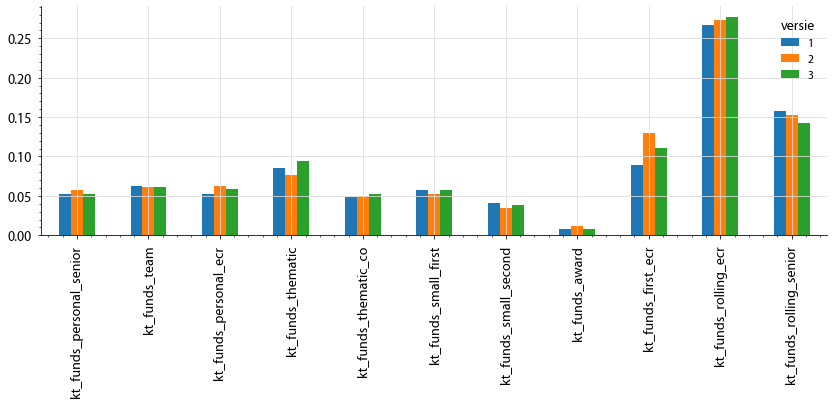

In [10]:
# Plot a histogram with a bar per version.
df_kt_per_version.mean().transpose().plot.bar()
plt.grid()

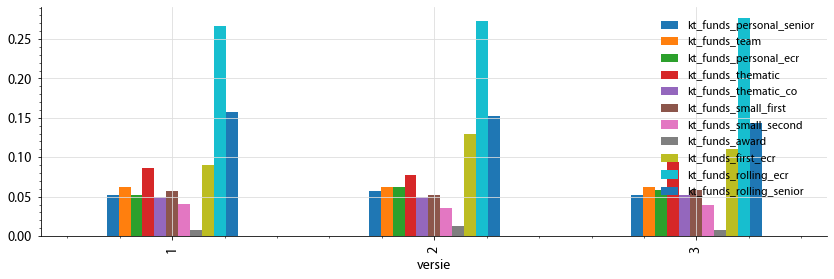

In [11]:
# Plot a histogram per version.
df_kt_per_version.mean().plot.bar()
plt.grid()